# Setup and Data Download

In [2]:
!pip install hvplot jupyter_bokeh scipy cartopy intake intake-xarray dask hvplot geoviews jupyter_bokeh
!node -v


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
v18.17.1


In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import hvplot.xarray
import holoviews as hv
hv.extension('bokeh')
%matplotlib inline

cat = xr.open_dataset("http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc")

ds = cat.sel(time=slice('1960', '2023'))
ds
# size of data in MB
ds.nbytes/1e6


48.976532

In [4]:
# from google.colab import output
# output.enable_custom_widget_manager()

In [18]:

# actually download the data
ds.load()
list(ds.sst)
ds.dims

Frozen({'lat': 89, 'lon': 180, 'time': 2036, 'nbnds': 2})

# Descriptive Visualizations of the Data

In [85]:
%output holomap='scrubber' fps=3
ds.sst.hvplot('lon', 'lat', cmap='Magma').redim.range(sst=(2, 40))

:DynamicMap   [time]
   :Image   [lon,lat]   (sst)

In [86]:
import cartopy.crs as ccrs
%output holomap='scrubber' fps=3
# ds.hvplot.violin(y='sst', by='time.year')
# ds.hvplot.heatmap(x='lon', y='lat', C='sst')
# ds.sst.mean(dim=['lat', 'lon']).hvplot(by='time.year', groupby=['time.year'])


ds.hvplot.quadmesh(
    'lon', 'lat', 'sst',  projection=ccrs.Orthographic(-90, 30),
    global_extent=True, frame_height=540, cmap='coolwarm',
    coastline=True, widget_location='bottom', fields={'time': {'default': ds.time.values[10]}}
)

Column
    [0] HoloViews(DynamicMap, sizing_mode='fixed', widget_location='bottom')
    [1] WidgetBox(align=('center', 'end'))
        [0] DiscreteSlider(margin=(20, 20, 20, 20), name='Time', options=OrderedDict([('1960-01-01 ...]), value=numpy.datetime64('1960-11-..., width=250)

In [87]:
ds.sst.hvplot.contourf(cmap='coolwarm', levels=10)

:DynamicMap   [time]
   :Polygons   [lon,lat]   (sst)

In [88]:
ds.mean(dim='time').hvplot.contourf(z='sst', x='lon', y='lat', levels=20,
                                    clabel='T [K]', label='Mean Air temperature [K]',
                                    cmap='coolwarm')

:Polygons   [lon,lat]   (sst)

In [89]:
ds.sst.hvplot.contourf(levels=25, geo=True, coastline=True, cmap='bkr', widget_location='left_top')

Row
    [0] WidgetBox
        [0] DiscreteSlider(margin=(20, 20, 20, 20), name='Time', options=OrderedDict([('1960-01-01 ...]), value=numpy.datetime64('1960-01-..., width=250)
    [1] HoloViews(DynamicMap, sizing_mode='fixed', widget_location='left_top')

# Difference from Temp 5 years before

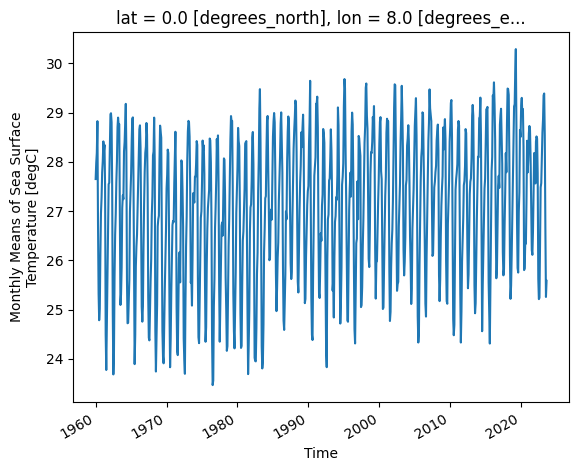

In [64]:
ds.sst.sel(lat=0.25, lon=7.8, method="nearest").plot()
# the above could visualize different lat/lon with sliders generated using the lat/lon bounds



# def calculate_past_temp(lat, lng):
#     logical_and
#     return np.where(ds.sst["lat"] == lat)[0]

# calculate_past_temp(ds.sst[0]["lat"][0], ds.sst[0]["lon"][0])

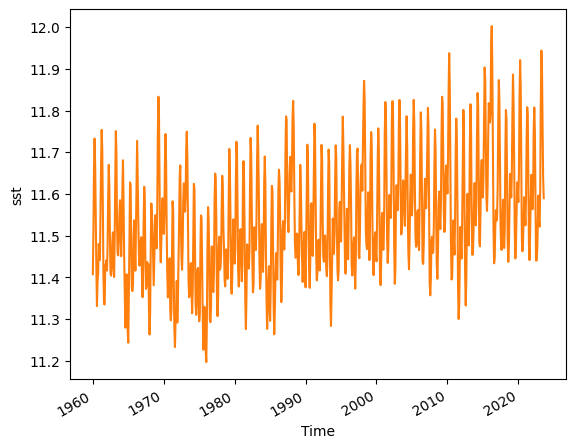

In [92]:
# ds.sst[0].plot()
ds.sst.attrs
ds.sst.sel(lat=60, lon=40).plot()
da = ds.sst
# da + 12

# ds.sst.where(ds.sst.notnull(), -99) <- this would replace all nan with -99
da.mean(dim="time")
da.std(dim=["lat","lon"]).plot()

In [126]:
# the above could visualize different lat/lon with sliders generated using the lat/lon bounds
ds.values
# da.sel(time="1960", lat=0, lon=0, method="nearest")

# rolling = ds.sst.rolling(time=60) 
# for label, arr_window in rolling:
#     print(arr_window[0])
    
# def calculate_past_temp(lat, lng):
#     logical_and
#     return np.where(ds.sst["lat"] == lat)[0]

# calculate_past_temp(ds.sst[0]["lat"][0], ds.sst[0]["lon"][0])


<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 764, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2023-08-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:             

# Begin Data Preprocessing

In [21]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 27.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 28.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 26.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [ ]:
import numpy
import netCDF4 as nc
import xarray
import tensorflow as tf
import os
import shutil
import glob
import plotly.express as px

# initialize directory of files
dir_ = "ncfiles"
kb = 1_024
mb = kb * kb


def save_dirs(target_size: int, total_size: int, dir_: str):
    shutil.rmtree(dir_, ignore_errors=True)
    os.makedirs(dir_)
    nfiles = int(total_size / target_size)
    n = int(target_size / 8)
    ds = xarray.DataArray(numpy.random.uniform(size=(n // 64, 64))).to_dataset(name="a")
    os.makedirs(dir_, exist_ok=True)

    print("Data size (MB):", ds.nbytes/mb)

    for i in range(nfiles):
        path = os.path.join(dir_, "{:2d}.nc".format(i))
        ds.to_netcdf(path)

# Begin playing with Tensorflow

In [129]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

features = da.pop('time')


AttributeError: 'DataArray' object has no attribute 'pop'

In [130]:
model.fit(da, epochs=10)


Epoch 1/10


ValueError: in user code:

    File "/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1082, in train_step
        self._validate_target_and_loss(y, loss)
    File "/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1036, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=<keras.src.losses.MeanSquaredError object at 0x148445250>, and therefore expects target data to be provided in `fit()`.


In [4]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 11.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [120]:
import numpy as np
import tensorflow as tf
import xarray as xr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

# Load your xarray dataset (replace 'your_dataset.nc' with the actual file path)
ds = xr.open_dataset("http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc", chunks={'lat': 25, 'lon': 25, 'time': -1})
da = ds.sst

In [121]:
da.data

dask.array<open_dataset-sst, shape=(2036, 89, 180), dtype=float32, chunksize=(2036, 25, 25), chunktype=numpy.ndarray>

In [102]:
# features_scaled = scaler.fit_transform(ds.sst)
from sklearn.preprocessing import StandardScaler

temperature = ds.sst # Shape: (time_steps, lat_dim, lon_dim)
time_steps, lat_dim, lon_dim = temperature.shape
temperature = temperature.values.reshape(time_steps, -1)


In [103]:
# Combine lat/lng values into a single feature (e.g., flatten or concatenate)
# features = np.column_stack((time, lat, lng))

# Standardize features (optional but often recommended for neural networks)
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(ds.sst)
# from sklearn.preprocessing import StandardScaler

# temperature = ds.sst.values  # Shape: (time_steps, lat_dim, lon_dim)
# time_steps, lat_dim, lon_dim = temperature.shape

# temperature = temperature.reshape(time_steps, -1)

# Standardize temperature data (optional but often recommended for neural networks)
scaler = StandardScaler()
temperature_scaled = scaler.fit_transform(temperature)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temperature_scaled, temperature_scaled, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(X_train.shape[1])  # Output layer with the same shape as input for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
# loss = model.evaluate(X_test, y_test)
# print(f"Test loss: {loss}")

# # Make predictions using the trained model
# predictions = model.predict(X_test)

# # Reshape predictions back to the original 3D shape
# predictions = predictions.reshape(predictions.shape[0], lat_dim, lon_dim)


/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Epoch 1/50
51/51 [==============================] - 2s 25ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 1s 24ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 1s 25ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 1s 25ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 1s 24ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 1s 24ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 1s 23ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 1s 25ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==============================] - 1s 24ms/step - loss: nan - val_loss: nan
Epoch 10/50
51/51 [==============================] - 1s 24ms/step - loss: nan - val_loss: nan
Epoch 11/50
51/51 [==============================] - 1s 24ms/step - l

KeyboardInterrupt: 